In [282]:
import numpy as np
from matplotlib import pyplot as plt
from scipy.optimize import curve_fit


In [283]:
t = np.random.uniform(20, 35, 100)
t.sort()
def periodic_func(a, uncertainty):
    f = a[0] + a[1]*t + a[2]*np.sin(a[4] * t) + a[3]*np.cos(a[4] * t) + np.random.normal(scale=uncertainty, size=len(t))
    return f

Lets test our function

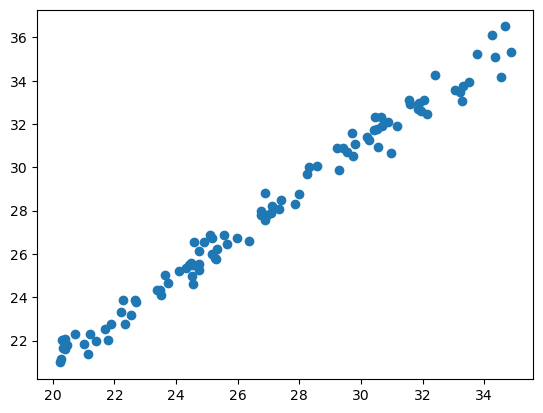

In [284]:
A = [0, 1, 1, 1, 0]
func = periodic_func(A, 0.5)
plt.plot(t, func, marker='o', linestyle='none')
plt.show()

In [285]:
def fit_function(time, *a):
    return a[0] + a[1]*time + a[2]*np.sin(a[4] * time) + a[3]*np.cos(a[4] * time)

In [286]:
init_vals = [0.0 for x in range(5)]
popt, pcov = curve_fit(fit_function, t, func, p0=init_vals)

Hmm, seems like our uncertainty is so high its trouble finding a fit, I'll try lowering the uncertainty until we get a fit

In [287]:
func = periodic_func(A, 0.1)
init_vals = [0.0 for x in range(5)]
popt, pcov = curve_fit(fit_function, t, func, p0=init_vals)

Interestingly, at this uncertainty the  a fit is found some of the time, I'll lower it by another 50%

In [288]:
func = periodic_func(A, 0.05)
init_vals = [0.0 for x in range(5)]
popt, pcov = curve_fit(fit_function, t, func, p0=init_vals)
perr = np.sqrt(np.diag(pcov))

print(popt)

[ 3.60320956  0.89759564 -0.00804633 -1.70986    -0.06191376]


These fit parameters seem way off from original function